In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab
import scipy.cluster.hierarchy as sch

import warnings
warnings.filterwarnings("ignore")

In [3]:
def plotDendogram(df, labels):
    ax = [None for i in range(df.shape[1])]
    im = [None for i in range(df.shape[1])]
    axColorBars = [None for i in range(df.shape[1])]

    fig = plt.figure()
    dendogramAX = fig.add_axes([0,0.4,2,2])
    Y = sch.linkage(df)
    Z = sch.dendrogram(Y)
    dendogramAX.set_xticks([])
    dendogramAX.set_yticks([])

    for i in range(df.shape[1]):
        colName = df.columns[i]
        ax[i] = fig.add_axes([0,0.1-(0.3*i),2,0.2])
        im[i] = ax[i].matshow([df.loc[Z["leaves"]][colName]], aspect='auto', cmap=pylab.cm.Reds)
        ax[i].set_xticks(range(len(labels)))

        if i==df.shape[1]-1:
            ax[i].xaxis.tick_bottom()
            ax[i].set_xticklabels([labels[k] for k in Z["leaves"]], rotation=90)
        else:
            ax[i].set_xticklabels([''])

        ax[i].set_yticklabels([''])
        ax[i].set_ylabel(colName)

        axColorBars[i] = fig.add_axes([2.1,0.1-(0.3*i),0.1,0.2])
        plt.colorbar(im[i], cax=axColorBars[i])

    plt.show()

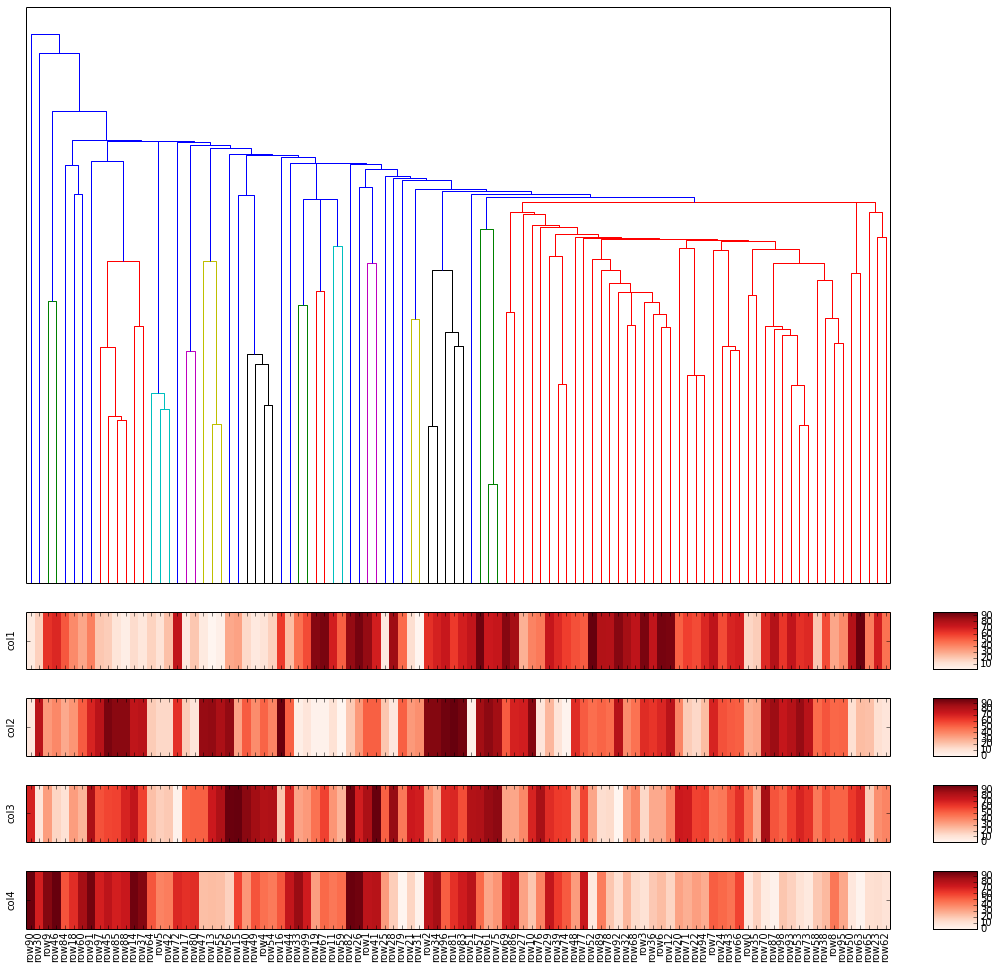

In [4]:
col1 = [int(np.random.sample()*100) for i in range(100)]
col2 = [int(np.random.sample()*100) for i in range(100)]
col3 = [int(np.random.sample()*100) for i in range(100)]
col4 = [int(np.random.sample()*100) for i in range(100)]

df = pd.DataFrame.from_dict({"col1": col1, "col2": col2, "col3": col3, "col4": col4})
labels = ["row"+str(i) for i in range(100)] 

plotDendogram(df, labels)